# Introduction to LLM (Large Language Models)

Large Language Models (LLM) are advanced neural network architectures designed to process and generate human language. They are trained on extensive text datasets, enabling them to understand context, syntax, and semantics.

The primary function of LLMs is to predict the next word in a sequence based on prior context. This capability allows them to perform various tasks, including:

* Text Generation: Creating coherent and contextually relevant content.
* Translation: Converting text from one language to another while maintaining meaning.
* Sentiment Analysis: Determining the emotional tone behind a piece of text.
* Conversational Agents: Powering chatbots and virtual assistants for interactive dialogues.

Training LLMs involves two phases: pre-training on vast datasets to learn general language patterns, followed by fine-tuning on specific tasks to enhance performance. While LLMs have transformed NLP, they also raise concerns about bias and ethical use, prompting ongoing research in these areas.

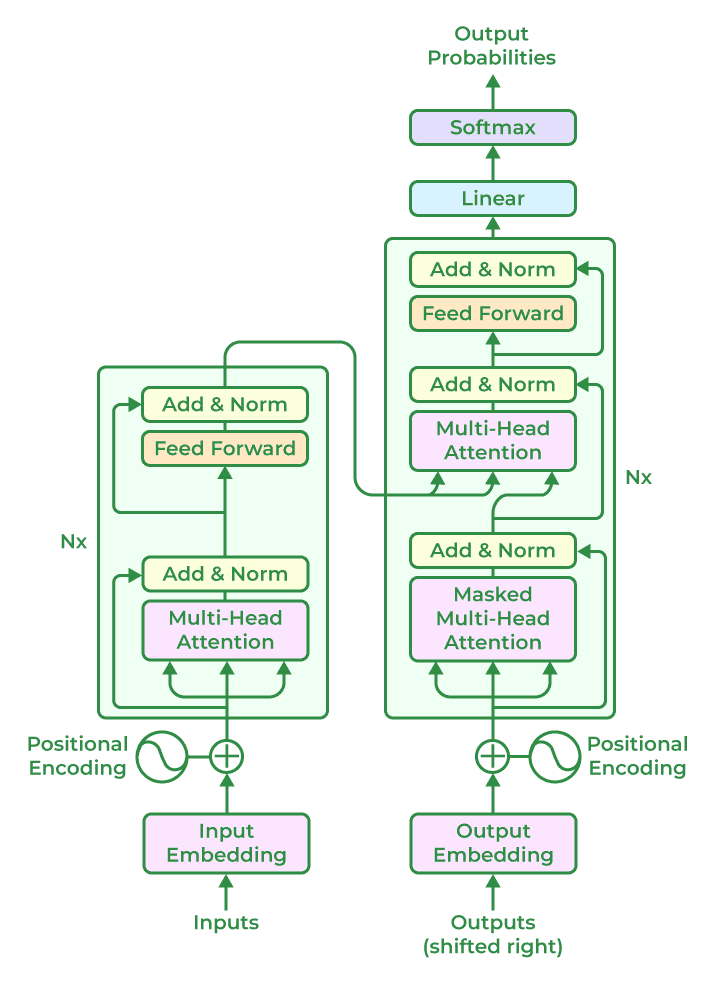

# What is LLM
LLM can be described as having two main components:

A large weights file. This file stores the billions of parameters that the model uses to predict text. For example, the Llama-2-70B model contains 70 billion parameters and weighs in at about 140 GB.
The code to run the model. A small script of about 500 lines of code that is responsible for interacting with the model and making its predictions.
Although the model takes up a significant amount of disk space, it can be run even on common devices like a MacBook without the need for specialized servers.

# Stages of LLM creation
## Stage 1: Pretraining
Pretraining is the process of training the model on huge volumes of text. This stage can be thought of as the process of compressing the Internet into a neural network.

Key steps of pretraining:

1. The model is trained on a huge volume of text data (~10 terabytes of text).
2. Powerful computing clusters with thousands of graphics processing units (GPUs) are used for training.
3. The pretraining process can take several weeks and cost millions of dollars.

**Example:** The Llama-2 model was trained on texts from the Internet and is able to predict the next word based on the previous ones. For the phrase "The cat sat on a", the model will predict the word "mat" with a high probability.

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "gpt2"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

input_text = "The cat sat on a"
inputs = tokenizer(input_text, return_tensors="pt")

with torch.no_grad():
    #outputs = model.generate(inputs["input_ids"], max_length=10)
    outputs = model.generate(inputs["input_ids"], max_length=10, pad_token_id=tokenizer.eos_token_id)

predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Original text:", input_text)
print("Predicted text:", predicted_text)


Original text: The cat sat on a
Predicted text: The cat sat on a bench, and the cat


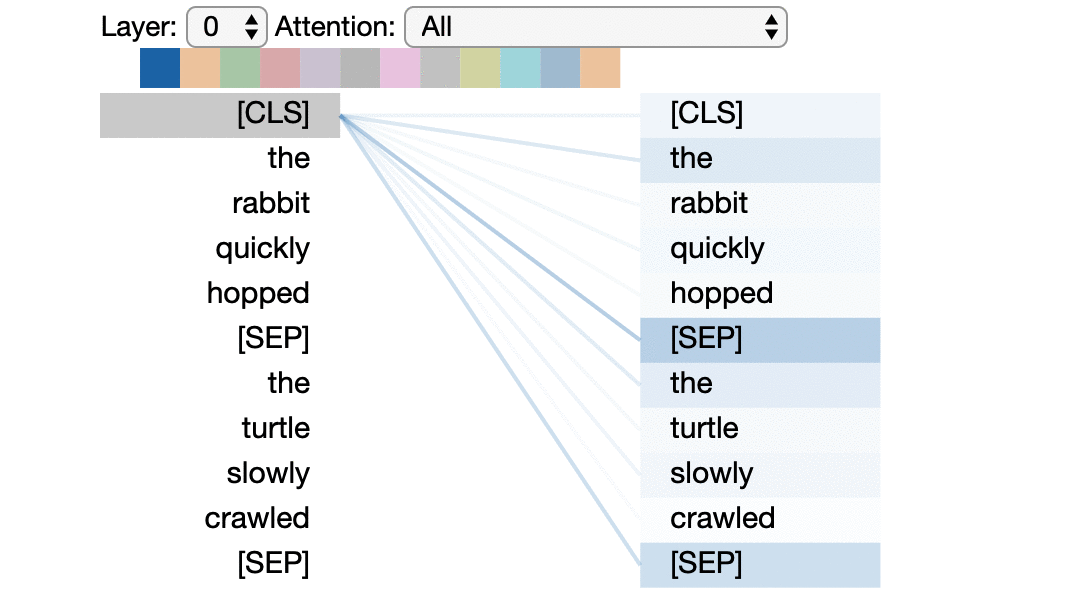

## Stage 2: Finetuning
After pre-training, the model is not very useful in practical tasks. To make it useful, fine-tuning is carried out on specialized datasets created manually.

**Goal:** Turn the basic model into an assistant that can answer questions and solve user problems.

# LLM Example: Code for Text Translation
Now let's look at some code examples for using a large language model (LLM) to translate text. We'll use a transformer-based model (like Llama-2) and the transformers library from Hugging Face.

## Loading the Model
Next, we will load the pre-trained translation model. For this example, we'll use a hypothetical translation model from Hugging Face's model hub:



In [ ]:
from transformers import pipeline

translator_en_to_es = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")
translator_es_to_en = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

## Translating Text
Now we can translate text from one language to another. Let's create a function to handle translations between English and Spanish:

In [ ]:
def translate_text(text, source_lang='en', target_lang='es'):
    if source_lang == 'en' and target_lang == 'es':
        translated = translator_en_to_es(text)
    elif source_lang == 'es' and target_lang == 'en':
        translated = translator_es_to_en(text)
    else:
        raise ValueError("Unsupported language pair")

    return translated[0]['translation_text']

texts_to_translate = [
    "Hello, how are you?",
    "What is your name?",
    "I love learning new languages.",
    "La vida es un sueño.",
    "¿Dónde está la biblioteca?"
]

for text in texts_to_translate:
    if text.isascii(): 
        translated_text = translate_text(text, source_lang='en', target_lang='es')
        print(f"Translated from English to Spanish: '{text}' -> '{translated_text}'")
    else:
        translated_text = translate_text(text, source_lang='es', target_lang='en')
        print(f"Translated from Spanish to English: '{text}' -> '{translated_text}'")


## Handling Multiple Translations
You might want to translate a list of sentences efficiently. Here’s an enhanced version that handles multiple translations in one go:

In [ ]:
def translate_multiple_texts(texts, source_lang='en', target_lang='es'):
    translations = []
    for text in texts:
        translated = translate_text(text, source_lang, target_lang)
        translations.append(translated)
    return translations

texts_to_translate = [
    "Hello, how are you?",
    "What is your name?",
    "I love learning new languages.",
    "La vida es un sueño.",
    "¿Dónde está la biblioteca?"
]

translations = translate_multiple_texts(texts_to_translate)
for original, translated in zip(texts_to_translate, translations):
    print(f"Original: '{original}' -> Translated: '{translated}'")


## Generating Text
Now let's look at an example of how to use LLM to generate text from a given start.

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

prompt_text = "Once upon a time in a land far away,"

input_ids = tokenizer.encode(prompt_text, return_tensors="pt")

output = model.generate(input_ids, max_length=100, num_return_sequences=1)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated text:", generated_text)

## Sentiment Analysis
We use LLM to analyze sentiment in text. In this example, we will apply the model to classify text as positive or negative.

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

text_to_analyze = "I love using this new model! It's amazing."

sentiment_result = sentiment_pipeline(text_to_analyze)
print("Result:", sentiment_result)

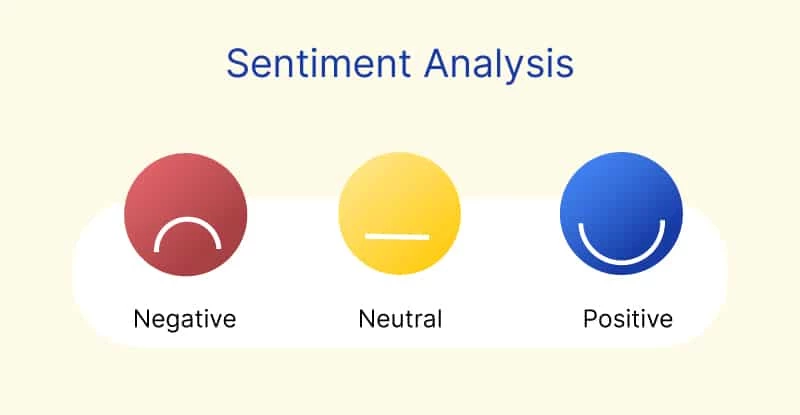

# Conclusion
LLMs are a powerful tool for natural language processing, allowing us to perform many tasks such as translation, text generation, and sentiment analysis. With their help, we can significantly simplify various processes related to working with text information. However, their creation requires enormous computing power and data. At the same time, as technology develops, we can expect the emergence of models that will be increasingly adapted to solving specific problems, and their capabilities will only expand.